# MODELADO INICIAL UTILIZANDO DEEP LEARNING CON KERAS

**Archvo: MODELADO_KERAS_DL.ipynb**

30 JUL
Tardo más de 15 horas para un resultado bastante malo. (Se tomaron en cuenta la totalidad de instancias)

28 Agosto
Se agregan celdas para el subsampling y se corrigen algunos errores.

Referencias:
* https://medium.com/@zaidi.houd/supervised-deep-learning-with-keras-tensorflow-and-theano-9dfd4fa17358
* https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
#Ubicamos el dataset
#path = "Z:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path PC Desktop en casa
#path = "U:\MASTER INT. ARTIFICIAL\TFM_DATA\CLEANDATA\\" # Path Laptop en casa
path = "F:\\DATA_TFM\\CLEANDATA\\" #Path PC Desktop en el trabajo
archivo = "dataset_completo.csv"

In [3]:
#Cargamos el dataset y leemos todo, para despues hacer subsampling
raw_dataset = pd.read_csv(path+archivo, usecols=['lin_det', 'piso_det', 'mód_opt', 'X\'', 'Y\'', 'Z\'', 'azimut', 'zenit',
                                             'tiempo', 't_selp', 'amp', 'frec_hits', 'aafit_azimut', 'aafit_zenit',
                                             'aafit_lambda', 'aafit_beta', 'bbfit_azimut', 'bbfit_zenit',
                                             'bbfit_quality', 'muon_azimut', 'muon_zenit'])#,nrows=10000)

In [4]:
#Realizamos el subsampling con n líneas
n=10000
rs=10
dataset = raw_dataset.sample(n, random_state=rs)
del raw_dataset #Borramos la anterior lista para liberar memoria
dataset.tail() #Mostramos como quedó el dataset

,lin_det,piso_det,mód_opt,X',Y',Z',azimut,zenit,tiempo,t_selp,...,frec_hits,aafit_azimut,aafit_zenit,aafit_lambda,aafit_beta,bbfit_azimut,bbfit_zenit,bbfit_quality,muon_azimut,muon_zenit
15675186,7,7,2,-35.477413,-15.095539,-83.514434,0.538065,2.356193,1111.213250,1111.213250,...,50.468445,-2.642994,1.581161,-6.514552,0.027619,-2.651094,1.606897,4.106721,-2.844497,1.626004
21153715,2,4,2,76.790921,57.827525,-127.803434,0.693055,2.356193,92.582143,92.582143,...,61.340332,-2.926584,1.357088,-5.881519,0.015498,-9.424778,1.306323,3.240517,-2.638245,1.583089
28343538,8,14,1,11.373284,-38.394692,18.272566,1.627880,2.356193,1112.395753,1059.810683,...,76.045990,0.134690,0.395073,-5.372895,0.007043,0.202409,0.378380,10.799513,0.115643,0.393628
22594244,7,15,0,-35.435291,-15.601902,32.677566,-0.372216,2.356193,1157.436781,1340.446590,...,148.773193,-2.230288,2.568302,-6.122077,0.007134,-2.174362,2.496019,4.713932,-2.167388,2.598427
25642591,4,4,0,44.390199,9.480367,-127.931434,-3.041185,2.356193,1400.076371,971.495534,...,53.329468,-1.216813,1.246325,-5.569547,0.011330,-1.561102,0.666758,16.605148,-1.688086,1.304435


C:\Users\Marco\Anaconda3\envs\tf_gpu\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


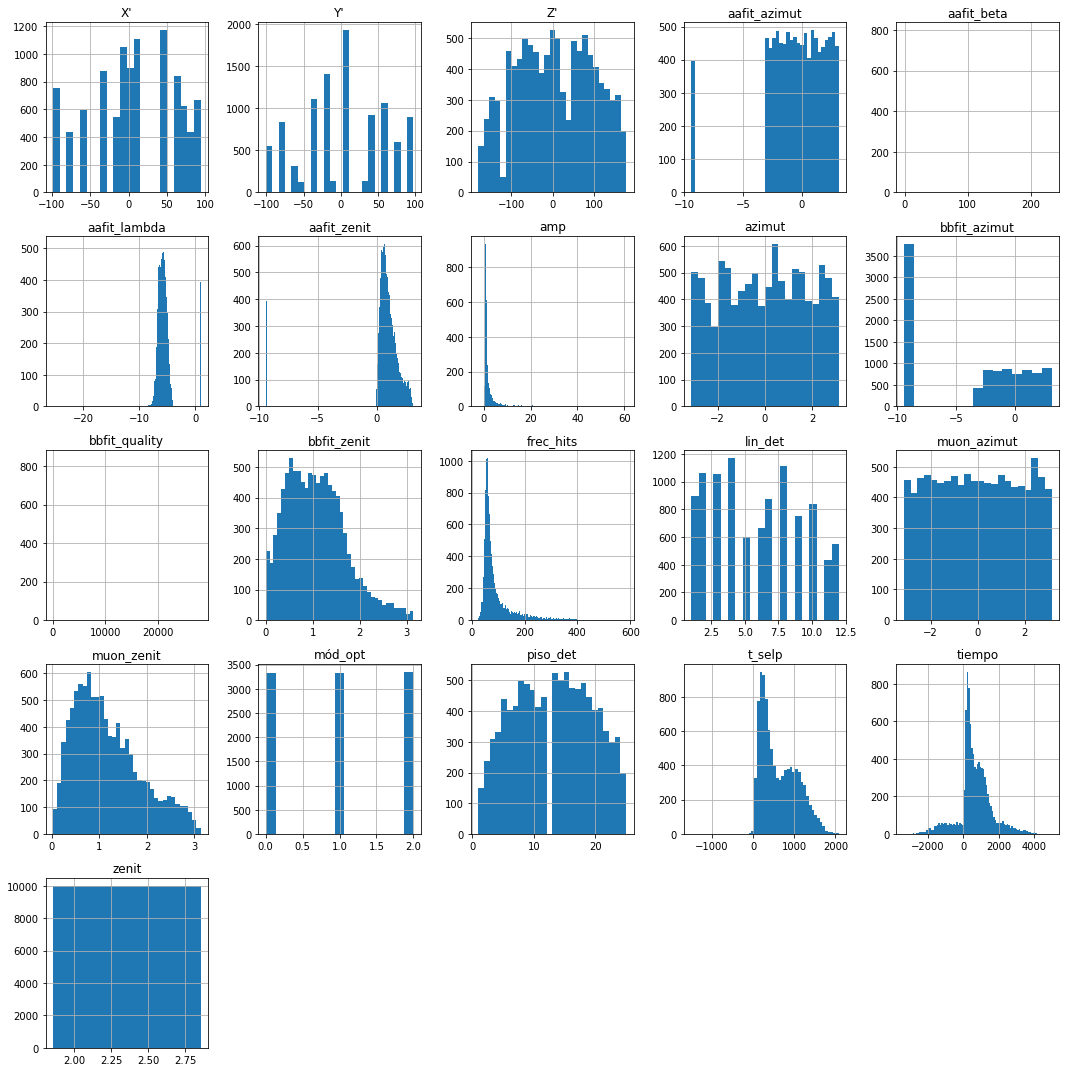

In [5]:
#Graficamos los histogramas de cada variable.
fig = plt.figure(figsize= (15,15))
ax = fig.gca()
dataset.hist(ax=ax,bins='auto')
plt.tight_layout()
plt.show()

In [5]:
### DIVISION DE LA DATA EN TRAIN Y TEST PARA VALIDACIÓN HOLD-OUT INICIAL (VALIDACIÓN ANIDADA AL FINAL)
X = dataset.iloc[:,:19]; Y = dataset.iloc[:,19:21]
#X_values = X.values; Y_values = Y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=rs)

train_dataset = X_train
test_dataset = X_test
train_labels = Y_train
test_labels = Y_test

In [6]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lin_det,7000.0,5.925286,3.322842e+00,1.000000,3.000000,6.000000,9.000000,12.000000
piso_det,7000.0,13.189286,6.415153e+00,1.000000,8.000000,13.000000,18.000000,25.000000
mód_opt,7000.0,1.008000,8.152315e-01,0.000000,0.000000,1.000000,2.000000,2.000000
X',7000.0,6.934512,5.464288e+01,-98.410729,-35.477413,4.796656,59.522488,93.934807
Y',7000.0,4.056723,5.538685e+01,-101.032169,-38.905038,8.852658,56.583390,97.285109
Z',7000.0,5.143692,9.303604e+01,-180.034434,-69.713892,3.622566,76.341566,177.946108
azimut,7000.0,0.027059,1.792421e+00,-3.119675,-1.549225,0.138309,1.554785,3.128265
zenit,7000.0,2.356193,4.441209e-16,2.356193,2.356193,2.356193,2.356193,2.356193
tiempo,7000.0,643.278220,9.658429e+02,-2950.127817,210.653128,541.000932,1118.670613,4123.794310
t_selp,7000.0,626.042185,4.340713e+02,-1501.918534,253.477331,501.081225,968.122924,2069.723822


In [7]:
train_labels.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
muon_azimut,7000.0,-0.004944,1.807806,-3.138808,-1.564820,-0.025166,1.552623,3.141137
muon_zenit,7000.0,1.168772,0.697160,0.020394,0.623252,1.028794,1.597991,3.131667


In [8]:
test_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lin_det,3000.0,5.958333,3.309116,1.000000,3.000000,6.000000,9.000000,12.000000
piso_det,3000.0,13.052333,6.375511,1.000000,8.000000,13.000000,18.000000,25.000000
mód_opt,3000.0,0.989667,0.819217,0.000000,0.000000,1.000000,2.000000,2.000000
X',3000.0,7.731038,54.289497,-98.406270,-35.471785,4.890204,59.589365,93.934807
Y',3000.0,3.168604,55.586925,-101.015388,-38.994051,8.885169,56.655686,97.285109
Z',3000.0,3.237397,92.459108,-180.034434,-69.716434,3.234566,76.213566,177.946108
azimut,3000.0,-0.002942,1.793004,-3.119675,-1.556330,0.036694,1.523739,3.128265
zenit,3000.0,2.356193,0.000000,2.356193,2.356193,2.356193,2.356193,2.356193
tiempo,3000.0,655.122779,944.978175,-3367.377155,223.626489,563.815039,1136.488242,4988.397927
t_selp,3000.0,638.618048,441.141451,-1227.519849,261.025716,515.303678,981.281740,2084.398824


In [9]:
test_labels.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
muon_azimut,3000.0,0.028143,1.819235,-3.139821,-1.599567,0.040811,1.625311,3.139282
muon_zenit,3000.0,1.183413,0.712636,0.026096,0.621854,1.047900,1.610532,3.096046


In [10]:
#Construyendo un primer modelo un poco al azar, tener en cuenta que la "longitud" de salida debe ser correcta
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(32, activation=tf.nn.relu),
        layers.Dense(2)
    ])
    opt = tf.keras.optimizers.RMSprop(0.001) #Revisar si hay que aumentarlo!!!, ¿menor o mayor learning rate?
    model.compile(loss='mean_squared_error', optimizer = opt, metrics=['mean_absolute_error','mean_squared_error'])
    return model

In [11]:
#Construyendo el modelo
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [12]:
#Observando las capas y el número de parámetros del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 11,746
Trainable params: 11,746
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Generando un conjunto de ejemplo para probar si vamos por buen camino
example_batch = train_dataset[:5]
result = model.predict(example_batch)

In [14]:
#Mostramos como se ve el conjunto de ejemplo
example_batch

,lin_det,piso_det,mód_opt,X',Y',Z',azimut,zenit,tiempo,t_selp,amp,frec_hits,aafit_azimut,aafit_zenit,aafit_lambda,aafit_beta,bbfit_azimut,bbfit_zenit,bbfit_quality
41247649,6,12,1,91.537303,-22.017381,-10.892434,2.685905,2.356193,137.877396,137.877396,7.419613,215.187073,-1.545984,0.545157,-6.060319,0.005439,-1.653827,0.688542,1.844221
38269624,3,16,1,-9.921345,38.173874,46.433566,1.480009,2.356193,128.930750,128.930750,3.267774,52.242279,-9.424778,-9.424778,1.000000,-1.000000,-9.424778,1.228090,3.341144
54617978,12,3,1,-15.448988,-94.107800,-141.997434,3.065515,2.356193,-154.648910,312.195632,0.821330,158.901215,-0.000343,0.593653,-6.440619,0.020818,-9.424778,0.932633,3.465858
36860860,2,13,0,75.855418,57.763479,2.907566,2.585370,2.356193,768.011906,766.285692,5.698338,39.367676,-2.305746,0.943282,-4.788101,0.006816,-2.181483,0.955478,1.054585
52854785,11,7,0,-79.141422,-58.487262,-84.039434,-2.456855,2.356193,650.729326,650.729326,2.309163,198.097229,0.573282,1.146408,-5.516725,0.007052,0.631700,1.144783,1.190997


In [15]:
#Mostramos como serían las predicciones usando el conjunto de ejemplo
result

array([[ 3.5316067 , 27.121492  ],
       [ 3.667615  , 15.691147  ],
       [-0.21860313, 18.890766  ],
       [ 8.074633  , 69.78176   ],
       [ 3.5120964 , 51.927235  ]], dtype=float32)

In [16]:
#Entrenamos el modelo, en este tenemos la opción de utilizar una función callback si lo deseamos, pero
#preferí observar los resultados intermedios.

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 100

history = model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.3, verbose=1)#, callbacks=[PrintDot()])

Train on 4900 samples, validate on 2100 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4900/4900 [==============================] - 1s 179us/sample - loss: 127.1364 - mean_absolute_error: 3.7119 - mean_squared_error: 127.1363 - val_loss: 71.5220 - val_mean_absolute_error: 5.3604 - val_mean_squared_error: 71.5220
Epoch 2/100
4900/4900 [==============================] - 1s 131us/sample - loss: 23.1355 - mean_absolute_error: 2.1341 - mean_squared_error: 23.1355 - val_loss: 4.9318 - val_mean_absolute_error: 1.5591 - val_mean_squared_error: 4.9318
Epoch 3/100
4900/4900 [==============================] - 1s 137us/sample - loss: 13.5952 - mean_absolute_error: 1.6408 - mean_squared_error: 13.5952 - val_loss: 7.0008 - val_mean_absolute_error: 1.7382 - val_mean_squared_error: 7.0008
Epoch 4/100
4900/4900 [==============================] - 1s 132us/sample - loss: 32.9099 - mean_absolute_error: 1.4247 - mean_squared_error: 32.9099 - val_loss: 3.3312 - val_mean_absolute_error: 

Epoch 35/100
4900/4900 [==============================] - 1s 130us/sample - loss: 1.2550 - mean_absolute_error: 0.7958 - mean_squared_error: 1.2550 - val_loss: 1.5361 - val_mean_absolute_error: 0.9130 - val_mean_squared_error: 1.5361
Epoch 36/100
4900/4900 [==============================] - 1s 130us/sample - loss: 1.2405 - mean_absolute_error: 0.7882 - mean_squared_error: 1.2405 - val_loss: 1.3737 - val_mean_absolute_error: 0.8217 - val_mean_squared_error: 1.3737
Epoch 37/100
4900/4900 [==============================] - 1s 128us/sample - loss: 1.2299 - mean_absolute_error: 0.7792 - mean_squared_error: 1.2299 - val_loss: 1.4288 - val_mean_absolute_error: 0.8440 - val_mean_squared_error: 1.4288
Epoch 38/100
4900/4900 [==============================] - 1s 129us/sample - loss: 1.2354 - mean_absolute_error: 0.7803 - mean_squared_error: 1.2354 - val_loss: 1.3786 - val_mean_absolute_error: 0.8288 - val_mean_squared_error: 1.3786
Epoch 39/100
4900/4900 [==============================] - 1s 142

In [17]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,0.872738,0.605270,0.872738,1.440191,0.718001,1.440192,95
96,0.891173,0.606797,0.891173,1.389332,0.770026,1.389332,96
97,0.864852,0.611757,0.864852,1.438476,0.762558,1.438476,97
98,0.874690,0.608323,0.874690,1.382525,0.751467,1.382525,98
99,0.849459,0.602923,0.849459,1.334668,0.713576,1.334668,99


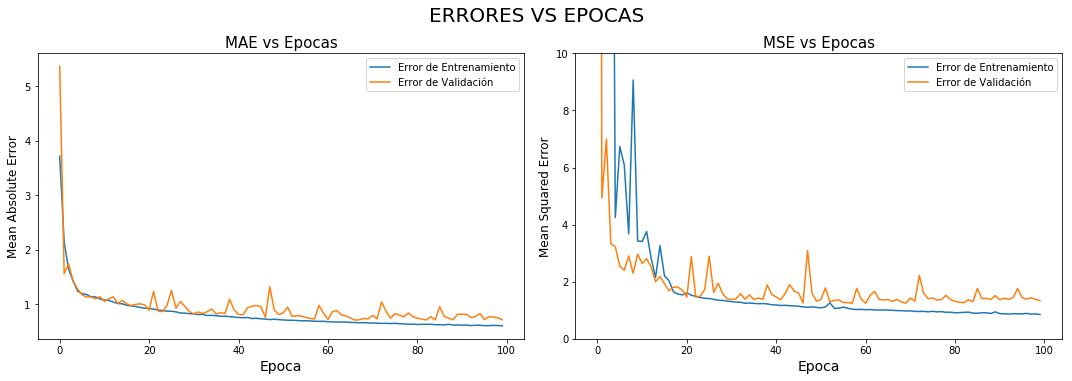

In [46]:
#Función para graficar el error de entrenamiento vs el error de validación
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
  fig.suptitle("ERRORES VS EPOCAS", size=20, y=1.05)
  ax1.set_title("MAE vs Epocas", size=15)
  ax1.set_xlabel('Epoca', size=14)
  ax1.set_ylabel('Mean Absolute Error', size=12)
  ax1.plot(hist['epoch'], hist['mean_absolute_error'],label='Error de Entrenamiento')
  ax1.plot(hist['epoch'], hist['val_mean_absolute_error'],label ='Error de Validación')
  plt.ylim([0,10])
  ax1.legend()
  ax2.set_title("MSE vs Epocas", size=15)
  ax2.set_xlabel('Epoca', size=14)
  ax2.set_ylabel('Mean Squared Error', size=12)
  ax2.plot(hist['epoch'], hist['mean_squared_error'],label='Error de Entrenamiento')
  ax2.plot(hist['epoch'], hist['val_mean_squared_error'],label ='Error de Validación')
  plt.ylim([0,10])
  ax2.legend()
  plt.tight_layout()
  plt.show()

#Graficamos los errores
plot_history(history)

In [48]:
#Verificando que tan bien generaliza el modelo y evaluando 
#las métricas de error: loss, mae y mse, para el modelo sobre el conjunto de test

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("Mean Abs Error, del conjunto de Test: {:5.2f}".format(mae))
print("Mean Square Error, del conjunto de Test: {:5.2f}".format(mse))

Mean Abs Error, del conjunto de Test:  0.72
Mean Square Error, del conjunto de Test:  1.36


In [49]:
# Generando las predicciones
y_predict = model.predict(X_test)

#Comparando algunas predicciones vs valores reales
print("Valores Predichos")
print(y_predict[0:5])
print("Valores Reales")
print(Y_test.iloc[0:5].values)

Valores Predichos
[[ 0.26501817  0.51853395]
 [ 1.0483525   1.1007625 ]
 [-1.1384277   1.6992036 ]
 [ 0.7468652   1.5033057 ]
 [-1.9908569   1.3450321 ]]
Valores Reales
[[ 0.23624189  0.36066225]
 [-0.30033259  0.84725319]
 [-0.46081619  2.56209755]
 [ 0.98577492  1.9117797 ]
 [-1.90603035  1.40997404]]


In [54]:
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error
import numpy as np

#Función para calcular las métricas
def metricas(y_true,y_predict):
    mae = mean_absolute_error(y_true,y_predict)
    mse = mean_squared_error(y_true,y_predict)
    rmse = np.sqrt(mse)
    maxe= max_error(y_true,y_predict)
    mape = np.mean(np.abs((y_true-y_predict)/y_true)) * 100
    return(mae,mse,rmse,mape,maxe)

In [55]:
#Obteniendo métricas
mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0])
mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1])

row_maz = [mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
row_mze = [mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]

data_errors = [row_maz,row_mze]

met_df = pd.DataFrame(data_errors, columns=['MAE','MSE','RMSE','MAPE','MAXE'])

print("\nMétricas de error, 0=Muon_Azimut, 1=Muon_Zenit")
met_df.transpose()


Métricas de error, 0=Muon_Azimut, 1=Muon_Zenit


,0,1
MAE,1.091764,0.344638
MSE,2.479925,0.230141
RMSE,1.574778,0.479730
MAPE,251.400313,47.698420
MAXE,8.723405,2.381922


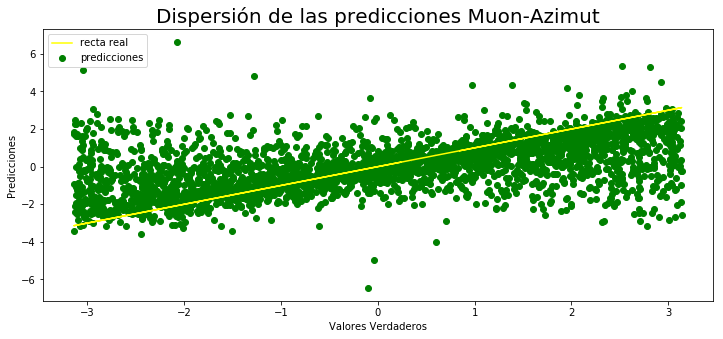

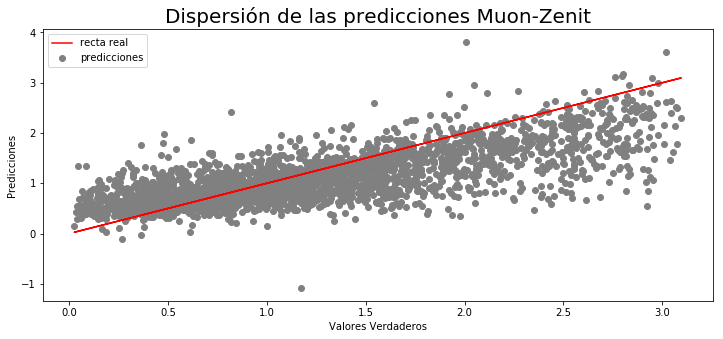

In [58]:
#Función para graficar la dispersión de las predicciones
def graf_disp():
    #Gráfica AZIMUT
    plt.figure(figsize=(12,5))
    plt.title("Dispersión de las predicciones Muon-Azimut", size=20)
    plt.xlabel('Valores Verdaderos')
    plt.ylabel('Predicciones')
    plt.scatter(Y_test.iloc[:,0],y_predict[:,0], c="green",label="predicciones")
    _ = plt.plot(Y_test.iloc[:,0],Y_test.iloc[:,0],c="yellow",label="recta real")
    #plt.ylim(-5,5)
    plt.legend()
    plt.show()
    #Gráfica ZENIT
    plt.figure(figsize=(12,5))
    plt.title("Dispersión de las predicciones Muon-Zenit", size=20)
    plt.xlabel('Valores Verdaderos')
    plt.ylabel('Predicciones')
    plt.scatter(Y_test.iloc[:,1],y_predict[:,1], c="gray",label="predicciones")
    _ = plt.plot(Y_test.iloc[:,1],Y_test.iloc[:,1],c="red",label="recta real")
    plt.legend()
    plt.show()

graf_disp()

## Entrenando el modelo por "más" épocas y observando si mejoran las métricas

In [61]:
#Fijamos a 500 las épocas y observaremos los resultados, usando por supuesto el mismo modelo
EPOCHS = 500
history = model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.3, verbose=1)#, callbacks=[PrintDot()])

Train on 4900 samples, validate on 2100 samples
Epoch 1/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.8490 - mean_absolute_error: 0.6021 - mean_squared_error: 0.8490 - val_loss: 1.3081 - val_mean_absolute_error: 0.7019 - val_mean_squared_error: 1.3081
Epoch 2/500
4900/4900 [==============================] - 1s 127us/sample - loss: 0.8444 - mean_absolute_error: 0.5988 - mean_squared_error: 0.8444 - val_loss: 1.6785 - val_mean_absolute_error: 0.8601 - val_mean_squared_error: 1.6785
Epoch 3/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.8409 - mean_absolute_error: 0.5970 - mean_squared_error: 0.8409 - val_loss: 1.3359 - val_mean_absolute_error: 0.7279 - val_mean_squared_error: 1.3359
Epoch 4/500
4900/4900 [==============================] - 1s 133us/sample - loss: 0.8394 - mean_absolute_error: 0.5935 - mean_squared_error: 0.8394 - val_loss: 1.4522 - val_mean_absolute_error: 0.7472 - val_mean_squared_error: 1.4522
Epoch 5/500
4900/490

Epoch 36/500
4900/4900 [==============================] - 1s 142us/sample - loss: 0.7456 - mean_absolute_error: 0.5534 - mean_squared_error: 0.7456 - val_loss: 1.4173 - val_mean_absolute_error: 0.7370 - val_mean_squared_error: 1.4173
Epoch 37/500
4900/4900 [==============================] - 1s 132us/sample - loss: 0.7367 - mean_absolute_error: 0.5534 - mean_squared_error: 0.7367 - val_loss: 1.3838 - val_mean_absolute_error: 0.7033 - val_mean_squared_error: 1.3838
Epoch 38/500
4900/4900 [==============================] - 1s 149us/sample - loss: 0.7253 - mean_absolute_error: 0.5437 - mean_squared_error: 0.7253 - val_loss: 1.5194 - val_mean_absolute_error: 0.7496 - val_mean_squared_error: 1.5194
Epoch 39/500
4900/4900 [==============================] - 1s 131us/sample - loss: 0.7375 - mean_absolute_error: 0.5509 - mean_squared_error: 0.7375 - val_loss: 1.6217 - val_mean_absolute_error: 0.7965 - val_mean_squared_error: 1.6217
Epoch 40/500
4900/4900 [==============================] - 1s 128

4900/4900 [==============================] - 1s 137us/sample - loss: 0.6625 - mean_absolute_error: 0.5201 - mean_squared_error: 0.6625 - val_loss: 1.4325 - val_mean_absolute_error: 0.7093 - val_mean_squared_error: 1.4325
Epoch 72/500
4900/4900 [==============================] - 1s 130us/sample - loss: 0.6615 - mean_absolute_error: 0.5168 - mean_squared_error: 0.6615 - val_loss: 1.4317 - val_mean_absolute_error: 0.7236 - val_mean_squared_error: 1.4317
Epoch 73/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.6457 - mean_absolute_error: 0.5130 - mean_squared_error: 0.6457 - val_loss: 1.6746 - val_mean_absolute_error: 0.8552 - val_mean_squared_error: 1.6746
Epoch 74/500
4900/4900 [==============================] - 1s 133us/sample - loss: 0.6438 - mean_absolute_error: 0.5136 - mean_squared_error: 0.6438 - val_loss: 1.5306 - val_mean_absolute_error: 0.7720 - val_mean_squared_error: 1.5306
Epoch 75/500
4900/4900 [==============================] - 1s 129us/sample - l

4900/4900 [==============================] - 1s 144us/sample - loss: 0.5886 - mean_absolute_error: 0.4911 - mean_squared_error: 0.5886 - val_loss: 1.5006 - val_mean_absolute_error: 0.7614 - val_mean_squared_error: 1.5006
Epoch 107/500
4900/4900 [==============================] - 1s 145us/sample - loss: 0.5967 - mean_absolute_error: 0.4946 - mean_squared_error: 0.5967 - val_loss: 1.6662 - val_mean_absolute_error: 0.8659 - val_mean_squared_error: 1.6662
Epoch 108/500
4900/4900 [==============================] - 1s 141us/sample - loss: 0.5847 - mean_absolute_error: 0.4875 - mean_squared_error: 0.5847 - val_loss: 1.6845 - val_mean_absolute_error: 0.8436 - val_mean_squared_error: 1.6846
Epoch 109/500
4900/4900 [==============================] - 1s 137us/sample - loss: 0.5871 - mean_absolute_error: 0.4871 - mean_squared_error: 0.5871 - val_loss: 1.4779 - val_mean_absolute_error: 0.7315 - val_mean_squared_error: 1.4779
Epoch 110/500
4900/4900 [==============================] - 1s 143us/sample

Epoch 141/500
4900/4900 [==============================] - 1s 133us/sample - loss: 0.5601 - mean_absolute_error: 0.4629 - mean_squared_error: 0.5601 - val_loss: 1.5810 - val_mean_absolute_error: 0.7716 - val_mean_squared_error: 1.5810
Epoch 142/500
4900/4900 [==============================] - 1s 141us/sample - loss: 0.5239 - mean_absolute_error: 0.4603 - mean_squared_error: 0.5239 - val_loss: 1.6265 - val_mean_absolute_error: 0.8109 - val_mean_squared_error: 1.6265
Epoch 143/500
4900/4900 [==============================] - 1s 137us/sample - loss: 0.5472 - mean_absolute_error: 0.4650 - mean_squared_error: 0.5472 - val_loss: 1.4892 - val_mean_absolute_error: 0.7350 - val_mean_squared_error: 1.4892
Epoch 144/500
4900/4900 [==============================] - 1s 131us/sample - loss: 0.5452 - mean_absolute_error: 0.4603 - mean_squared_error: 0.5452 - val_loss: 1.5027 - val_mean_absolute_error: 0.7575 - val_mean_squared_error: 1.5027
Epoch 145/500
4900/4900 [==============================] - 1

Epoch 176/500
4900/4900 [==============================] - 1s 128us/sample - loss: 0.4887 - mean_absolute_error: 0.4466 - mean_squared_error: 0.4887 - val_loss: 1.6859 - val_mean_absolute_error: 0.8288 - val_mean_squared_error: 1.6859
Epoch 177/500
4900/4900 [==============================] - 1s 149us/sample - loss: 0.4891 - mean_absolute_error: 0.4515 - mean_squared_error: 0.4891 - val_loss: 1.5761 - val_mean_absolute_error: 0.7479 - val_mean_squared_error: 1.5761
Epoch 178/500
4900/4900 [==============================] - 1s 141us/sample - loss: 0.4857 - mean_absolute_error: 0.4479 - mean_squared_error: 0.4857 - val_loss: 1.5693 - val_mean_absolute_error: 0.7312 - val_mean_squared_error: 1.5693
Epoch 179/500
4900/4900 [==============================] - 1s 137us/sample - loss: 0.4765 - mean_absolute_error: 0.4435 - mean_squared_error: 0.4765 - val_loss: 1.6149 - val_mean_absolute_error: 0.7928 - val_mean_squared_error: 1.6149
Epoch 180/500
4900/4900 [==============================] - 1

Epoch 211/500
4900/4900 [==============================] - 1s 134us/sample - loss: 0.4704 - mean_absolute_error: 0.4355 - mean_squared_error: 0.4704 - val_loss: 1.6001 - val_mean_absolute_error: 0.7723 - val_mean_squared_error: 1.6001
Epoch 212/500
4900/4900 [==============================] - 1s 139us/sample - loss: 0.4767 - mean_absolute_error: 0.4388 - mean_squared_error: 0.4767 - val_loss: 1.4659 - val_mean_absolute_error: 0.7028 - val_mean_squared_error: 1.4659
Epoch 213/500
4900/4900 [==============================] - 1s 132us/sample - loss: 0.4578 - mean_absolute_error: 0.4345 - mean_squared_error: 0.4578 - val_loss: 1.5347 - val_mean_absolute_error: 0.7413 - val_mean_squared_error: 1.5347
Epoch 214/500
4900/4900 [==============================] - 1s 131us/sample - loss: 0.4606 - mean_absolute_error: 0.4351 - mean_squared_error: 0.4606 - val_loss: 1.6915 - val_mean_absolute_error: 0.8144 - val_mean_squared_error: 1.6915
Epoch 215/500
4900/4900 [==============================] - 1

Epoch 246/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.4456 - mean_absolute_error: 0.4235 - mean_squared_error: 0.4456 - val_loss: 1.5292 - val_mean_absolute_error: 0.7290 - val_mean_squared_error: 1.5292
Epoch 247/500
4900/4900 [==============================] - 1s 126us/sample - loss: 0.4548 - mean_absolute_error: 0.4229 - mean_squared_error: 0.4548 - val_loss: 1.6135 - val_mean_absolute_error: 0.7773 - val_mean_squared_error: 1.6135
Epoch 248/500
4900/4900 [==============================] - 1s 141us/sample - loss: 0.4209 - mean_absolute_error: 0.4145 - mean_squared_error: 0.4209 - val_loss: 1.6055 - val_mean_absolute_error: 0.8467 - val_mean_squared_error: 1.6055
Epoch 249/500
4900/4900 [==============================] - 1s 142us/sample - loss: 0.4305 - mean_absolute_error: 0.4236 - mean_squared_error: 0.4305 - val_loss: 1.7667 - val_mean_absolute_error: 0.8795 - val_mean_squared_error: 1.7667
Epoch 250/500
4900/4900 [==============================] - 1

Epoch 281/500
4900/4900 [==============================] - 1s 130us/sample - loss: 0.4398 - mean_absolute_error: 0.4084 - mean_squared_error: 0.4398 - val_loss: 1.6753 - val_mean_absolute_error: 0.7933 - val_mean_squared_error: 1.6753
Epoch 282/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.4052 - mean_absolute_error: 0.4057 - mean_squared_error: 0.4052 - val_loss: 1.5303 - val_mean_absolute_error: 0.7435 - val_mean_squared_error: 1.5303
Epoch 283/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.4367 - mean_absolute_error: 0.4091 - mean_squared_error: 0.4367 - val_loss: 1.7831 - val_mean_absolute_error: 0.8589 - val_mean_squared_error: 1.7831
Epoch 284/500
4900/4900 [==============================] - 1s 127us/sample - loss: 0.4035 - mean_absolute_error: 0.4073 - mean_squared_error: 0.4035 - val_loss: 1.6226 - val_mean_absolute_error: 0.7456 - val_mean_squared_error: 1.6226
Epoch 285/500
4900/4900 [==============================] - 1

Epoch 316/500
4900/4900 [==============================] - 1s 148us/sample - loss: 0.3849 - mean_absolute_error: 0.4023 - mean_squared_error: 0.3849 - val_loss: 1.6722 - val_mean_absolute_error: 0.7832 - val_mean_squared_error: 1.6722
Epoch 317/500
4900/4900 [==============================] - 1s 144us/sample - loss: 0.3784 - mean_absolute_error: 0.3966 - mean_squared_error: 0.3784 - val_loss: 1.6645 - val_mean_absolute_error: 0.7905 - val_mean_squared_error: 1.6645
Epoch 318/500
4900/4900 [==============================] - 1s 133us/sample - loss: 0.3715 - mean_absolute_error: 0.3933 - mean_squared_error: 0.3715 - val_loss: 1.6029 - val_mean_absolute_error: 0.7311 - val_mean_squared_error: 1.6029
Epoch 319/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.3768 - mean_absolute_error: 0.3975 - mean_squared_error: 0.3768 - val_loss: 1.6686 - val_mean_absolute_error: 0.8036 - val_mean_squared_error: 1.6686
Epoch 320/500
4900/4900 [==============================] - 1

Epoch 351/500
4900/4900 [==============================] - 1s 126us/sample - loss: 0.3559 - mean_absolute_error: 0.3907 - mean_squared_error: 0.3559 - val_loss: 1.6658 - val_mean_absolute_error: 0.7836 - val_mean_squared_error: 1.6658
Epoch 352/500
4900/4900 [==============================] - 1s 128us/sample - loss: 0.3669 - mean_absolute_error: 0.3924 - mean_squared_error: 0.3669 - val_loss: 1.6570 - val_mean_absolute_error: 0.7583 - val_mean_squared_error: 1.6570
Epoch 353/500
4900/4900 [==============================] - 1s 128us/sample - loss: 0.3566 - mean_absolute_error: 0.3873 - mean_squared_error: 0.3566 - val_loss: 1.7152 - val_mean_absolute_error: 0.8332 - val_mean_squared_error: 1.7152
Epoch 354/500
4900/4900 [==============================] - 1s 125us/sample - loss: 0.4267 - mean_absolute_error: 0.3887 - mean_squared_error: 0.4267 - val_loss: 1.6186 - val_mean_absolute_error: 0.7286 - val_mean_squared_error: 1.6186
Epoch 355/500
4900/4900 [==============================] - 1

Epoch 386/500
4900/4900 [==============================] - 1s 129us/sample - loss: 0.3381 - mean_absolute_error: 0.3786 - mean_squared_error: 0.3381 - val_loss: 1.5986 - val_mean_absolute_error: 0.7361 - val_mean_squared_error: 1.5986
Epoch 387/500
4900/4900 [==============================] - 1s 127us/sample - loss: 0.3403 - mean_absolute_error: 0.3823 - mean_squared_error: 0.3403 - val_loss: 1.6084 - val_mean_absolute_error: 0.8175 - val_mean_squared_error: 1.6084
Epoch 388/500
4900/4900 [==============================] - 1s 126us/sample - loss: 0.3436 - mean_absolute_error: 0.3819 - mean_squared_error: 0.3436 - val_loss: 1.7500 - val_mean_absolute_error: 0.7819 - val_mean_squared_error: 1.7500
Epoch 389/500
4900/4900 [==============================] - 1s 128us/sample - loss: 0.3369 - mean_absolute_error: 0.3782 - mean_squared_error: 0.3369 - val_loss: 1.5812 - val_mean_absolute_error: 0.7375 - val_mean_squared_error: 1.5812
Epoch 390/500
4900/4900 [==============================] - 1

Epoch 421/500
4900/4900 [==============================] - 1s 136us/sample - loss: 0.3169 - mean_absolute_error: 0.3726 - mean_squared_error: 0.3169 - val_loss: 1.6037 - val_mean_absolute_error: 0.7786 - val_mean_squared_error: 1.6037
Epoch 422/500
4900/4900 [==============================] - 1s 127us/sample - loss: 0.3298 - mean_absolute_error: 0.3702 - mean_squared_error: 0.3298 - val_loss: 1.7491 - val_mean_absolute_error: 0.7940 - val_mean_squared_error: 1.7491
Epoch 423/500
4900/4900 [==============================] - 1s 133us/sample - loss: 0.3269 - mean_absolute_error: 0.3725 - mean_squared_error: 0.3269 - val_loss: 1.6176 - val_mean_absolute_error: 0.7357 - val_mean_squared_error: 1.6176
Epoch 424/500
4900/4900 [==============================] - 1s 132us/sample - loss: 0.3361 - mean_absolute_error: 0.3747 - mean_squared_error: 0.3361 - val_loss: 1.6820 - val_mean_absolute_error: 0.8032 - val_mean_squared_error: 1.6820
Epoch 425/500
4900/4900 [==============================] - 1

Epoch 456/500
4900/4900 [==============================] - 1s 127us/sample - loss: 0.3151 - mean_absolute_error: 0.3657 - mean_squared_error: 0.3151 - val_loss: 1.5617 - val_mean_absolute_error: 0.7208 - val_mean_squared_error: 1.5617
Epoch 457/500
4900/4900 [==============================] - 1s 128us/sample - loss: 0.3234 - mean_absolute_error: 0.3663 - mean_squared_error: 0.3234 - val_loss: 1.6589 - val_mean_absolute_error: 0.7424 - val_mean_squared_error: 1.6589
Epoch 458/500
4900/4900 [==============================] - 1s 127us/sample - loss: 0.3065 - mean_absolute_error: 0.3622 - mean_squared_error: 0.3065 - val_loss: 1.5888 - val_mean_absolute_error: 0.7591 - val_mean_squared_error: 1.5888
Epoch 459/500
4900/4900 [==============================] - 1s 126us/sample - loss: 0.3177 - mean_absolute_error: 0.3706 - mean_squared_error: 0.3177 - val_loss: 1.6939 - val_mean_absolute_error: 0.8047 - val_mean_squared_error: 1.6939
Epoch 460/500
4900/4900 [==============================] - 1

Epoch 491/500
4900/4900 [==============================] - 1s 143us/sample - loss: 0.2987 - mean_absolute_error: 0.3581 - mean_squared_error: 0.2987 - val_loss: 1.6629 - val_mean_absolute_error: 0.7675 - val_mean_squared_error: 1.6629
Epoch 492/500
4900/4900 [==============================] - 1s 133us/sample - loss: 0.2997 - mean_absolute_error: 0.3598 - mean_squared_error: 0.2997 - val_loss: 1.6740 - val_mean_absolute_error: 0.7765 - val_mean_squared_error: 1.6740
Epoch 493/500
4900/4900 [==============================] - 1s 128us/sample - loss: 0.3079 - mean_absolute_error: 0.3575 - mean_squared_error: 0.3079 - val_loss: 1.6734 - val_mean_absolute_error: 0.7740 - val_mean_squared_error: 1.6734
Epoch 494/500
4900/4900 [==============================] - 1s 126us/sample - loss: 0.3799 - mean_absolute_error: 0.3667 - mean_squared_error: 0.3799 - val_loss: 1.5936 - val_mean_absolute_error: 0.7304 - val_mean_squared_error: 1.5936
Epoch 495/500
4900/4900 [==============================] - 1

In [62]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
495,0.310595,0.359962,0.310595,1.791202,0.800276,1.791202,495
496,0.304974,0.360367,0.304974,1.636881,0.783502,1.636881,496
497,0.301380,0.360005,0.301379,1.590709,0.725202,1.590709,497
498,0.306832,0.361776,0.306832,1.714826,0.756481,1.714826,498
499,0.303683,0.361012,0.303683,1.712311,0.749305,1.712311,499


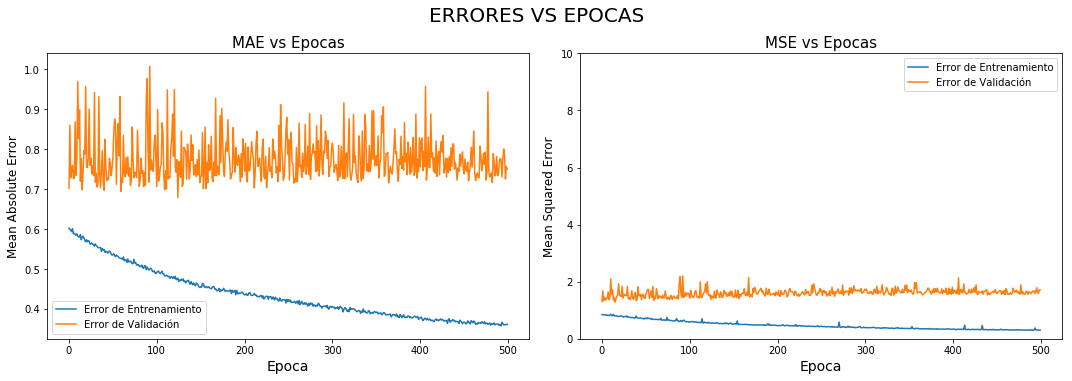

In [63]:
#Graficamos los errores
plot_history(history)

In [64]:
#Verificando que tan bien generaliza el modelo y evaluando 
#las métricas de error: loss, mae y mse, para el modelo sobre el conjunto de test

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

print("Mean Abs Error, del conjunto de Test: {:5.2f}".format(mae))
print("Mean Square Error, del conjunto de Test: {:5.2f}".format(mse))

Mean Abs Error, del conjunto de Test:  0.75
Mean Square Error, del conjunto de Test:  1.69


In [65]:
# Generando las predicciones
y_predict = model.predict(X_test)

#Comparando algunas predicciones vs valores reales
print("Valores Predichos")
print(y_predict[0:5])
print("Valores Reales")
print(Y_test.iloc[0:5].values)

Valores Predichos
[[ 0.2109066   0.45672357]
 [-0.10466398  1.5662637 ]
 [-1.1086001   1.9854792 ]
 [ 0.42508635  1.4992248 ]
 [-2.6309173   1.590485  ]]
Valores Reales
[[ 0.23624189  0.36066225]
 [-0.30033259  0.84725319]
 [-0.46081619  2.56209755]
 [ 0.98577492  1.9117797 ]
 [-1.90603035  1.40997404]]


In [66]:
#Obteniendo métricas
mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz = metricas(Y_test.iloc[:,0],y_predict[:,0])
mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze = metricas(Y_test.iloc[:,1],y_predict[:,1])

row_maz = [mae_maz,mse_maz,rmse_maz,mape_maz,maxe_maz]
row_mze = [mae_mze,mse_mze,rmse_mze,mape_mze,maxe_mze]

data_errors = [row_maz,row_mze]

met_df = pd.DataFrame(data_errors, columns=['MAE','MSE','RMSE','MAPE','MAXE'])

print("\nMétricas de error, 0=Muon_Azimut, 1=Muon_Zenit")
met_df.transpose()


Métricas de error, 0=Muon_Azimut, 1=Muon_Zenit


,0,1
MAE,1.198912,0.299183
MSE,3.197917,0.185041
RMSE,1.788272,0.430164
MAPE,518.123391,44.637012
MAXE,12.629932,2.771246


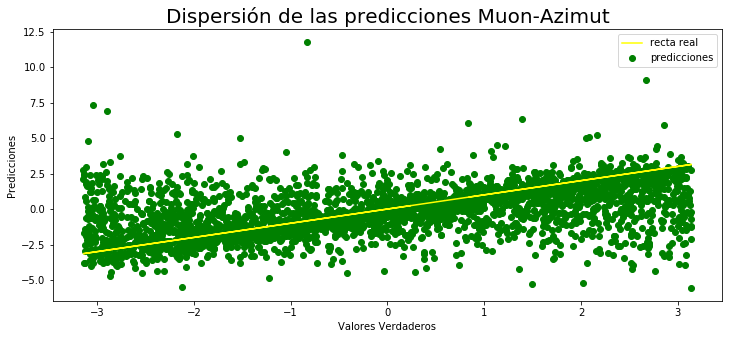

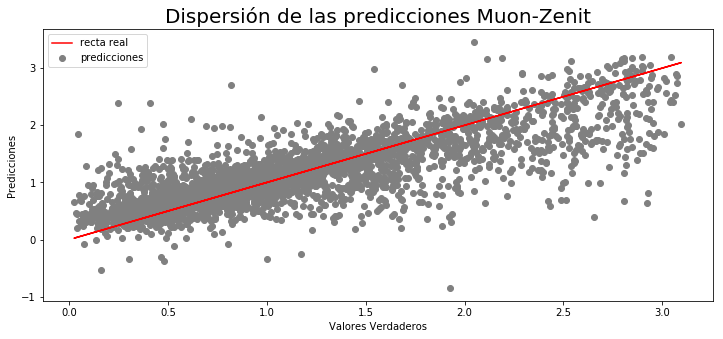

In [67]:
#Graficamos las dispersiones de los errores
graf_disp()